In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [28]:
data = pd.read_csv('GT4.csv')

In [29]:
X = data.drop('LandAverageTemperature', axis=1) # Features
y = data['LandAverageTemperature'].to_numpy()
y=y.reshape(len(y),1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42 )

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc_x=StandardScaler()
sc_y=StandardScaler()

In [32]:
X_train_sc=sc_x.fit_transform(X_train)
X_test_sc=sc_x.fit_transform(X_test)
y_train_sc=sc_y.fit_transform(y_train)
y_test_sc=sc_y.fit_transform(y_test)
X_val_sc=sc_x.fit_transform(X_val)
y_val_sc=sc_y.fit_transform(y_val)

In [33]:
svr = SVR(kernel='rbf', C=100, gamma='auto')
svr.fit(X_train_sc, y_train_sc)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma='auto')

In [34]:
y_train_pred=svr.predict(X_train_sc)
y_test_pred=svr.predict(X_test_sc)
y_val_pred=svr.predict(X_val_sc)

In [35]:
train_mse = mean_squared_error(y_train_sc, y_train_pred)
test_mse = mean_squared_error(y_test_sc,y_test_pred)
val_mse=mean_squared_error(y_val_sc,y_val_pred)

In [36]:
print("Training set mse:", train_mse)
print("Testing set mse:", test_mse)
print("Validation mse:", test_mse)

Training set mse: 0.03370053199808758
Testing set mse: 0.055619260339886754
Validation mse: 0.055619260339886754


In [37]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [38]:
train_r_sq = r2_score(y_train_sc, y_train_pred)
test_r_sq = r2_score(y_test_sc, y_test_pred)
val_r_sq=r2_score(y_val_sc,y_val_pred)

In [39]:
print("Training set r_squared:", train_r_sq)
print("Testing set r_squared:", test_r_sq)
print("Validation r_squared:", test_r_sq)

Training set r_squared: 0.9662994680019125
Testing set r_squared: 0.9443807396601133
Validation r_squared: 0.9443807396601133


In [40]:
train_mae = mean_absolute_error(y_train_sc, y_train_pred)
test_mae = mean_absolute_error(y_test_sc, y_test_pred)
val_mae=mean_absolute_error(y_val_sc,y_val_pred)

In [41]:
print("Training set mae:", train_mae)
print("Testing set mae:", test_mae)
print("Validation mae:", test_mae)

Training set mae: 0.11436026641186255
Testing set mae: 0.15038927746251407
Validation mae: 0.15038927746251407


In [45]:
def predict_unknown(features):
    # Scale the input features
    scaled_features = sc_x.transform([features])
    # Make predictions
    prediction = svr.predict(scaled_features)
    # Reverse-transform the prediction to get the final result
    predicted_value = sc_y.inverse_transform(prediction.reshape(-1, 1))
    return predicted_value[0, 0]

In [46]:
user_input = []  # User input for features
for feature_name in X.columns:
    feature_value = float(input(f"Enter value for {feature_name}: "))
    user_input.append(feature_value)

Enter value for year:  1920
Enter value for month:  12


In [47]:
predicted_value = predict_unknown(user_input)
print("Predicted value:", predicted_value)

Predicted value: 3.5043838546046455


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
x=X_test['month'].head(10)
y=y_test_pred[:10]

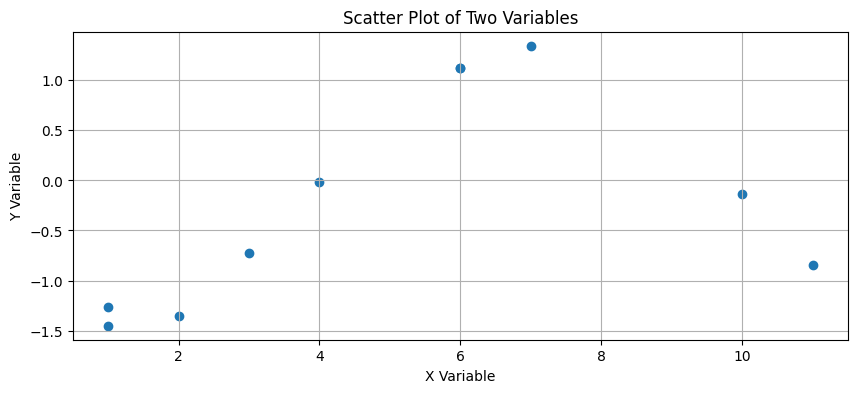

In [24]:
plt.figure(figsize=(10, 4))
plt.scatter(x, y)
plt.xlabel('X Variable')
plt.ylabel('Y Variable')
plt.title('Scatter Plot of Two Variables')
plt.grid(True)  # Optional: add grid
plt.show()

In [25]:
x=X_test['month'].head(10)
y=y_test[:10]

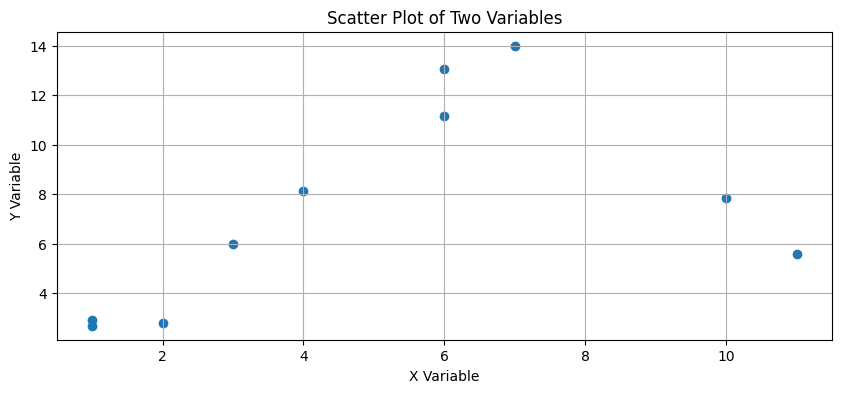

In [26]:
plt.figure(figsize=(10, 4))
plt.scatter(x, y)
plt.xlabel('X Variable')
plt.ylabel('Y Variable')
plt.title('Scatter Plot of Two Variables')
plt.grid(True)  # Optional: add grid
plt.show()